In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
airbnb=pd.read_csv('./Downloads/data/listings.csv')

In [3]:
airbnb.shape

(20226, 16)

## Remove duplicate

In [4]:
airbnb.duplicated().sum()
airbnb.drop_duplicates(inplace=True)

In [5]:
airbnb.isnull().sum()

id                                   0
name                                 3
host_id                              0
host_name                            5
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5253
reviews_per_month                 5253
calculated_host_listings_count       0
availability_365                     0
dtype: int64

## Drop unnecessary columns

In [6]:
airbnb.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

In [7]:
airbnb.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,45,1,76,0.59,1,107
1,83531,Latina,Cármenes,40.40341,-3.74084,Private room,31,4,33,0.46,2,364
2,82175,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,60,15,0,NaN,6,349
3,101471,Centro,Universidad,40.42202,-3.70395,Entire home/apt,92,4,10,0.14,1,87
4,101653,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,0.60,1,349


In [8]:
airbnb.neighbourhood_group.value_counts(normalize=True)

Centro                   0.468654
Salamanca                0.066301
Chamberí                 0.061456
Arganzuela               0.051419
Tetuán                   0.039800
Ciudad Lineal            0.034016
Carabanchel              0.033274
Latina                   0.031741
Chamartín                0.027390
Moncloa - Aravaca        0.026797
Puente de Vallecas       0.026649
San Blas - Canillejas    0.026056
Retiro                   0.024770
Hortaleza                0.018639
Fuencarral - El Pardo    0.015722
Usera                    0.015673
Villaverde               0.008850
Barajas                  0.008751
Moratalaz                0.006131
Villa de Vallecas        0.004697
Vicálvaro                0.003214
Name: neighbourhood_group, dtype: float64

#### Rreplace the 'reviews per month' by zero

In [9]:
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

Remove the NaN values from the dataset¶

In [10]:
airbnb.isnull().sum()
airbnb.dropna(how='any',inplace=True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20226 entries, 0 to 20225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         20226 non-null  int64  
 1   neighbourhood_group             20226 non-null  object 
 2   neighbourhood                   20226 non-null  object 
 3   latitude                        20226 non-null  float64
 4   longitude                       20226 non-null  float64
 5   room_type                       20226 non-null  object 
 6   price                           20226 non-null  int64  
 7   minimum_nights                  20226 non-null  int64  
 8   number_of_reviews               20226 non-null  int64  
 9   reviews_per_month               20226 non-null  float64
 10  calculated_host_listings_count  20226 non-null  int64  
 11  availability_365                20226 non-null  int64  
dtypes: float64(3), int64(6), object(

## Check continous variable

In [12]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.022600e+04,20226.000000,20226.000000,20226.000000,20226.000000,20226.000000,20226.000000,20226.000000,20226.000000
mean,1.211037e+08,40.421071,-3.694406,115.860773,5.489766,34.115940,0.990970,11.072481,163.920202
std,1.078360e+08,0.022379,0.028462,317.566208,29.281089,64.987894,1.441955,28.626750,146.080268
min,7.952000e+03,40.324030,-3.863910,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.558549e+07,40.409690,-3.707630,35.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,9.227854e+07,40.419785,-3.701390,59.000000,2.000000,6.000000,0.340000,2.000000,127.000000
75%,2.068523e+08,40.429650,-3.688422,99.000000,3.000000,36.000000,1.410000,6.000000,345.000000
max,3.670963e+08,40.562740,-3.528920,11600.000000,1125.000000,657.000000,23.850000,213.000000,365.000000


In [13]:
airbnb.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

## Get Correlation between different variables

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

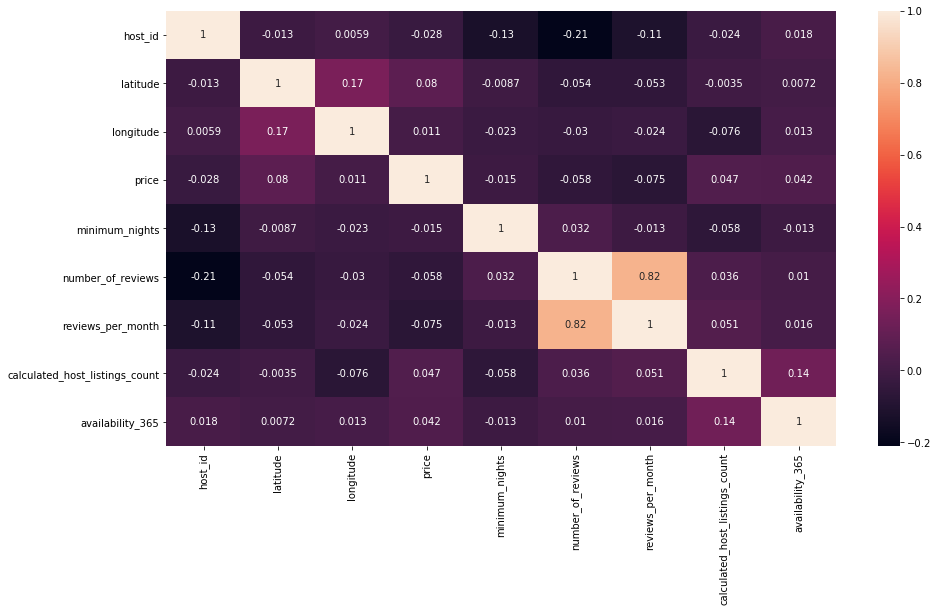

In [14]:
corr = airbnb.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns

In [15]:
airbnb.shape

(20226, 12)

In [16]:
import seaborn as sns
airbnb['neighbourhood_group'].unique()

array(['Chamartín', 'Latina', 'Arganzuela', 'Centro',
       'Fuencarral - El Pardo', 'Salamanca', 'Puente de Vallecas',
       'Ciudad Lineal', 'Chamberí', 'Villaverde', 'Hortaleza',
       'Moncloa - Aravaca', 'Carabanchel', 'Tetuán',
       'San Blas - Canillejas', 'Retiro', 'Villa de Vallecas', 'Barajas',
       'Usera', 'Moratalaz', 'Vicálvaro'], dtype=object)

Plot all Neighbourhood Group

Text(0.5, 1.0, 'Neighbourhood Group')

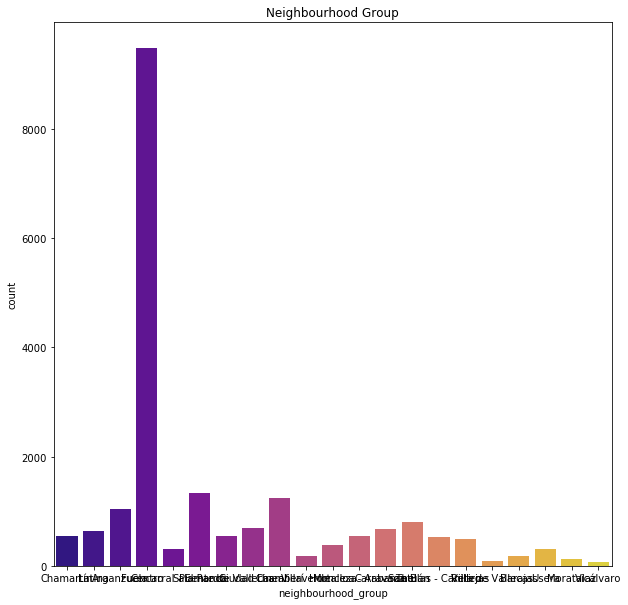

In [17]:
sns.countplot(airbnb['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Neighbourhood

Text(0.5, 1.0, 'Neighbourhood')

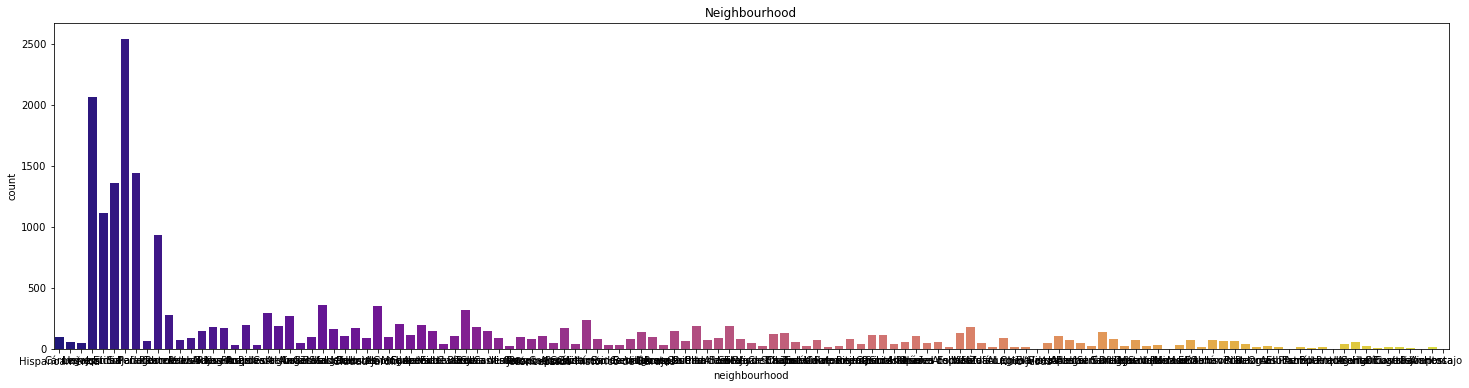

In [18]:
sns.countplot(airbnb['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

Room Type

Text(0.5, 1.0, 'Restaurants delivering online or Not')

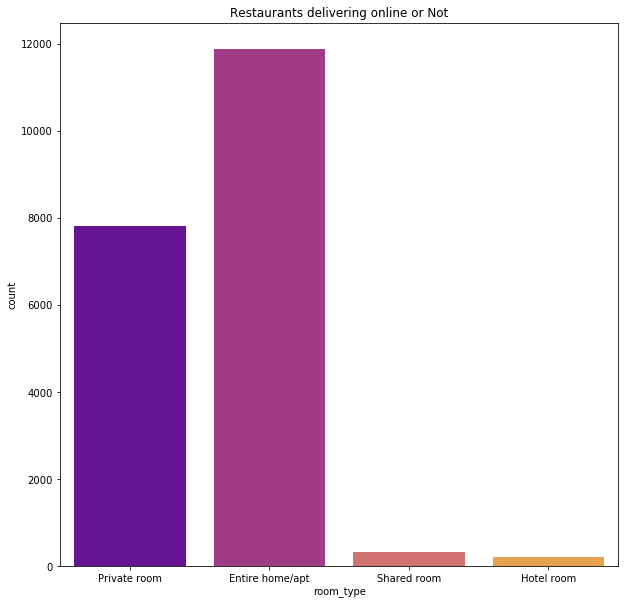

In [19]:
sns.countplot(airbnb['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')